
1. What is K-Nearest Neighbors (KNN) and how does it work?
K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for both classification and regression tasks. It is a non-parametric, instance-based learning algorithm that makes predictions based on the similarity between data points.
How KNN works:
- Given a dataset, KNN stores all training data points.
- When a new data point needs to be classified or predicted, KNN computes the distance between this new point and every point in the dataset.
- It selects the K nearest neighbors (where K is a pre-defined parameter).
- For classification, the algorithm assigns the majority class among the K neighbors to the new data point.
- For regression, the algorithm takes the average (or weighted average) of the values of the K neighbors.

2. What is the difference between KNN Classification and KNN Regression?
- KNN Classification: Used to categorize a data point into one of several predefined classes. The class is determined by the majority vote among the K neighbors.
- KNN Regression: Used to predict a continuous value rather than a discrete category. It calculates the average (or weighted average) of the K nearest neighbors’ values.

3. What is the role of the distance metric in KNN?
The distance metric is crucial for KNN because it determines how "close" or "similar" two data points are. Some common distance metrics used in KNN:
- Euclidean Distance (most common): Measures straight-line distance in space.
- Manhattan Distance: Measures distance by summing absolute differences between dimensions.
- Minkowski Distance: A generalized form of Euclidean and Manhattan distance.
- Cosine Similarity: Measures angle similarity between vectors (useful for text-based data).

Choosing an appropriate distance metric depends on the nature of the data.
4. What is the Curse of Dimensionality in KNN?
The Curse of Dimensionality refers to the phenomenon where the performance of KNN deteriorates as the number of dimensions (features) increases. In higher-dimensional spaces:
- Data points become more spread out, making "nearest neighbors" less meaningful.
- The distance between points becomes less distinguishable.
- KNN may struggle to find relevant neighbors, leading to poor classification/regression results.

Dimensionality reduction techniques like Principal Component Analysis (PCA) can help mitigate this issue.
5. How can we choose the best value of K in KNN?
Choosing the right K is crucial for achieving optimal accuracy:
- A small K (e.g., K=1): Can lead to overfitting; sensitive to noise.
- A large K: Provides smoother predictions but may lead to underfitting.

A common approach:
- Use cross-validation to test multiple values of K.
- Plot an error vs. K graph to find the K that minimizes error.
- A common rule of thumb is K ≈ sqrt(N), where N is the number of samples.

6. What are KD Tree and Ball Tree in KNN?
KD Tree and Ball Tree are data structures used for efficient neighbor searches in KNN:
- KD Tree (K-Dimensional Tree): A binary tree structure that partitions the dataset based on dimensions. It speeds up search operations in lower dimensions.
- Ball Tree: Organizes data into hierarchical clusters using hyperspheres (balls) rather than axis-aligned partitions, making it more efficient for high-dimensional data.

7. When should you use KD Tree vs. Ball Tree?
- KD Tree: Works well for low-dimensional datasets (typically <30 dimensions).
- Ball Tree: Performs better for high-dimensional datasets where KD Tree becomes inefficient due to the Curse of Dimensionality.

8. What are the disadvantages of KNN?
- Computational Complexity: KNN requires storing and comparing all data points, making predictions slow for large datasets.
- Sensitivity to Noise: Outliers can impact predictions significantly.
- High Memory Requirement: Since KNN is a lazy learner, it doesn't build a model but stores the entire dataset.
- Curse of Dimensionality: Performance drops in high-dimensional spaces.

9. How does feature scaling affect KNN?
Feature scaling is important because KNN relies on distance measurements:
- Without scaling, features with larger numerical ranges dominate the distance calculations, leading to misleading results.
- Techniques like Min-Max Scaling and Standardization (Z-score scaling) ensure that all features contribute equally to distance calculations.

10. What is PCA (Principal Component Analysis)?
Principal Component Analysis (PCA) is a technique used for dimensionality reduction:
- It transforms data into a new coordinate system where the largest variance is captured along the principal components.
- PCA helps improve KNN performance by reducing the effects of high-dimensional noise.
- It works by computing the eigenvectors and eigenvalues of the covariance matrix.

11. How does PCA work?
Principal Component Analysis (PCA) is a dimensionality reduction technique that identifies patterns in data and transforms them into a new coordinate system. It works by:
- Standardizing the Data – Ensures features have equal influence by normalizing them.
- Computing the Covariance Matrix – Measures relationships between different features.
- Finding Eigenvalues & Eigenvectors – These define principal components.
- Selecting the Top Principal Components – These components capture the most variance in the data.
- Transforming Data into the New Space – Projects the data onto the selected principal components.

12. What is the geometric intuition behind PCA?
PCA finds a new set of axes to represent the data by:
- Identifying the directions of maximum variance in the dataset.
- Rotating the coordinate system so that the first principal component captures the most variation, the second captures the next most, and so on.
- Think of it as finding the best-fit line in a high-dimensional space to project data onto.

13. What is the difference between Feature Selection and Feature Extraction?
- Feature Selection: Choosing a subset of existing features that contribute most to prediction accuracy (e.g., removing irrelevant features).
- Feature Extraction: Creating new features by transforming the original ones (e.g., PCA creates new uncorrelated features).

14. What are Eigenvalues and Eigenvectors in PCA?
- Eigenvectors: Represent the directions of the principal components.
- Eigenvalues: Indicate the variance captured by each eigenvector. Higher eigenvalues correspond to eigenvectors that capture more information.

15. How do you decide the number of components to keep in PCA?
- Use a scree plot to analyze the eigenvalues.
- Choose components that retain 90-95% variance.
- Use the elbow method (where variance gain starts diminishing).

16. Can PCA be used for classification?
- PCA is not inherently a classification algorithm, but it reduces feature dimensions, making classifiers like KNN or SVM more efficient.
- PCA can increase classification accuracy if too many redundant features exist.

17. What are the limitations of PCA?
- Loss of Interpretability: Transformed features are abstract.
- Assumes Linearity: PCA works best when data variation is linear.
- Sensitive to Scaling: Features must be standardized before applying PCA.

18. How do KNN and PCA complement each other?
- PCA reduces dimensionality, making KNN more efficient.
- PCA mitigates Curse of Dimensionality, improving KNN classification.
- KNN works best with fewer features, and PCA helps achieve that.

19. How does KNN handle missing values in a dataset?
- Imputation: Missing values are filled using mean, median, or KNN-based nearest neighbor interpolation.
- Dropping Instances: Removing incomplete rows if missing values are minimal.
- Weighted Distance Calculation: Adjusting distance metrics to ignore missing values.

20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?
| Feature | PCA | LDA |
| Goal | Maximize variance | Maximize class separability |
| Type | Unsupervised | Supervised |
| Axes | Orthogonal principal components | Directions that optimize class separation |
| Application | Dimensionality reduction | Classification improvement |





In [2]:
# 1. Train a KNN Classifier on the Iris dataset and print model accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 1.00


In [3]:
# 2. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=3, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

Mean Squared Error: 1046.43


In [2]:

# Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling to ensure fair distance calculations
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN Classifier with Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

# Train KNN Classifier with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

# Print comparison of accuracy for both metrics
print(f"Accuracy (Euclidean Distance): {accuracy_euclidean:.2f}")
print(f"Accuracy (Manhattan Distance): {accuracy_manhattan:.2f}")




Accuracy (Euclidean Distance): 1.00
Accuracy (Manhattan Distance): 1.00


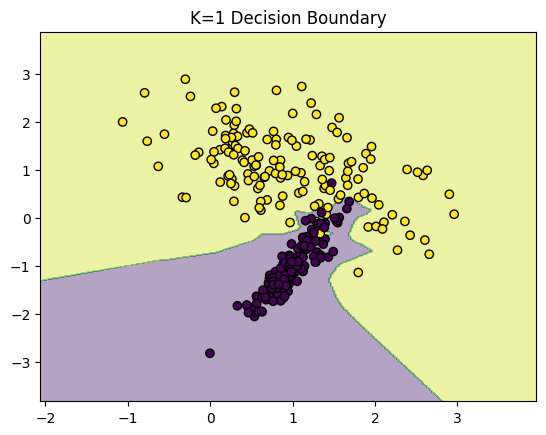

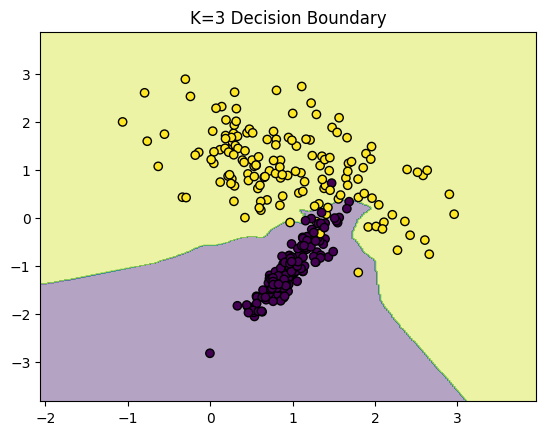

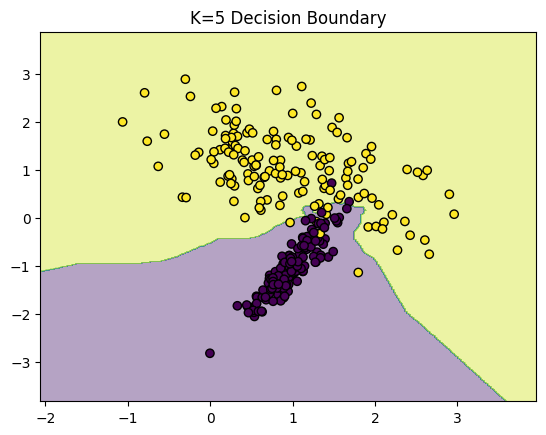

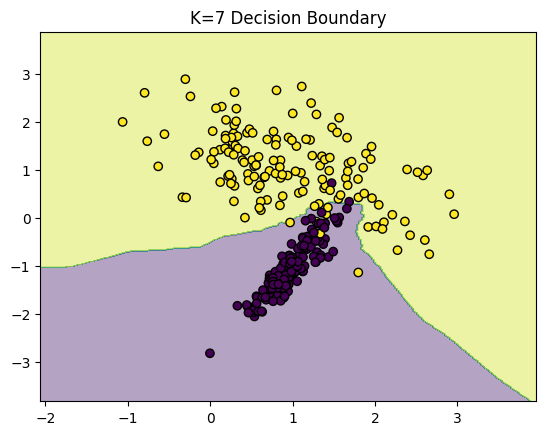

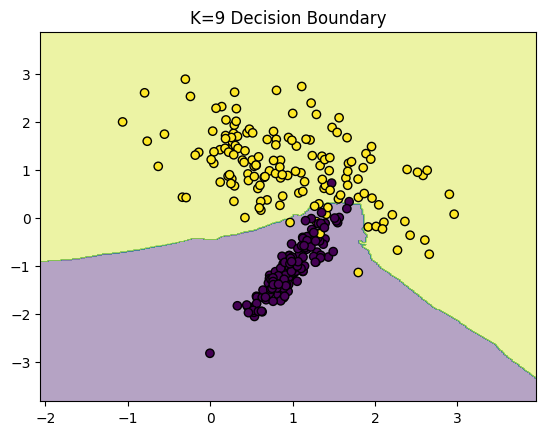

In [4]:
# Train a KNN Classifier with different values of K and visualize decision boundaries

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate synthetic 2D data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_samples=300, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

def plot_decision_boundary(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title(title)
    plt.show()

for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    plot_decision_boundary(X, y, knn, f"K={k} Decision Boundary")



In [5]:
# Apply Feature Scaling before training a KNN model and compare results with unscaled data

from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=300, n_features=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Unscaled KNN
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, knn_unscaled.predict(X_test))

# Scaled KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, knn_scaled.predict(X_test_scaled))

print(f"Accuracy without scaling: {acc_unscaled}")
print(f"Accuracy with scaling: {acc_scaled}")


ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

In [6]:
# Train a PCA model on synthetic data and print the explained variance ratio for each component

from sklearn.decomposition import PCA

X, _ = make_classification(n_samples=300, n_features=5, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio:
[5.89870715e-01 2.22196175e-01 1.87933111e-01 1.45903176e-17
 0.00000000e+00]


In [7]:
# Apply PCA before training a KNN Classifier and compare accuracy with and without PCA

X, y = make_classification(n_samples=300, n_features=10, n_informative=8, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Without PCA
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
acc_no_pca = knn.score(X_test_scaled, y_test)

# With PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
acc_with_pca = knn_pca.score(X_test_pca, y_test)

print(f"Accuracy without PCA: {acc_no_pca}")
print(f"Accuracy with PCA: {acc_with_pca}")


Accuracy without PCA: 0.9066666666666666
Accuracy with PCA: 0.6533333333333333


In [8]:
# Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV

from sklearn.model_selection import GridSearchCV

X, y = make_classification(n_samples=300, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

params = {'n_neighbors': list(range(1, 11))}
grid = GridSearchCV(KNeighborsClassifier(), params, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best K:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best K: {'n_neighbors': 5}
Best Score: 0.9422222222222221


In [9]:
# Train a KNN Classifier and check the number of misclassified samples

X, y = make_classification(n_samples=300, n_features=4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
preds = knn.predict(X_test_scaled)

misclassified = (y_test != preds).sum()
print("Number of misclassified samples:", misclassified)


Number of misclassified samples: 6


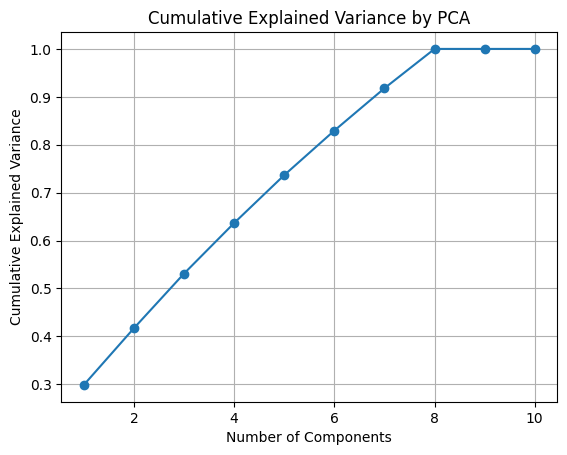

In [10]:
# Train a PCA model and visualize the cumulative explained variance

X, _ = make_classification(n_samples=300, n_features=10, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA')
plt.grid(True)
plt.show()


In [11]:
# Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=300, n_features=4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

for weight in ['uniform', 'distance']:
    knn = KNeighborsClassifier(n_neighbors=5, weights=weight)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print(f"Accuracy with weights='{weight}': {acc}")


Accuracy with weights='uniform': 0.92
Accuracy with weights='distance': 0.92


In [12]:
# Train a KNN Regressor and analyze the effect of different K values on performance
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=200, n_features=3, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

for k in [1, 3, 5, 7, 9]:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    preds = knn_reg.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    print(f"K={k}, MSE={mse}")


K=1, MSE=1363.2768243544606
K=3, MSE=900.4942618986363
K=5, MSE=899.2662495077403
K=7, MSE=1110.4226638305665
K=9, MSE=1319.5768060321457


In [13]:
# Implement KNN Imputation for handling missing values in a dataset
from sklearn.impute import KNNImputer
import numpy as np

X = np.array([[1, 2], [np.nan, 3], [7, 6], [4, np.nan]])
imputer = KNNImputer(n_neighbors=2)
X_imputed = imputer.fit_transform(X)
print("Imputed Data:")
print(X_imputed)


Imputed Data:
[[1. 2.]
 [4. 3.]
 [7. 6.]
 [4. 4.]]


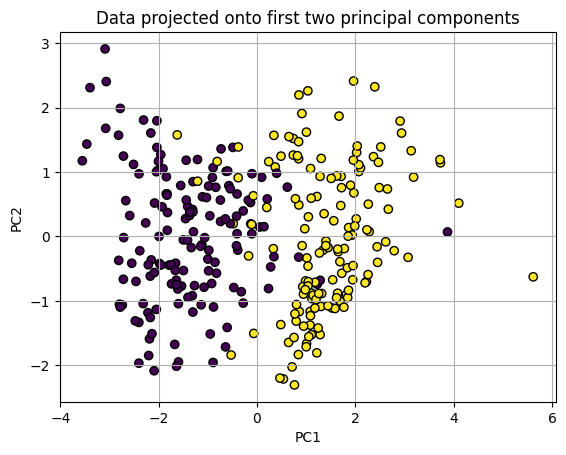

In [14]:
# Train a PCA model and visualize the data projection onto the first two principal components
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=300, n_features=5, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Data projected onto first two principal components")
plt.grid(True)
plt.show()


In [15]:
# Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time

data = load_iris()
X, y = data.data, data.target
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for algo in ['kd_tree', 'ball_tree']:
    start = time.time()
    knn = KNeighborsClassifier(algorithm=algo)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print(f"Algorithm: {algo}, Accuracy: {acc:.4f}, Time: {time.time() - start:.4f}s")


Algorithm: kd_tree, Accuracy: 1.0000, Time: 0.0089s
Algorithm: ball_tree, Accuracy: 1.0000, Time: 0.0086s


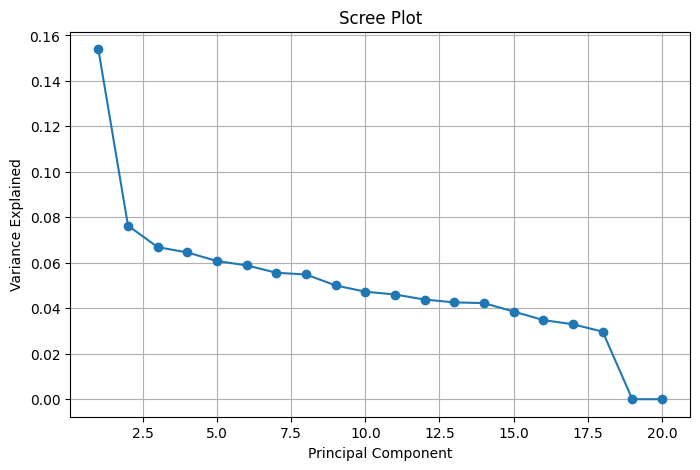

In [16]:
# Train a PCA model on a high-dimensional dataset and visualize the Scree plot

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

X, _ = make_classification(n_samples=300, n_features=20, random_state=42)
X = StandardScaler().fit_transform(X)

pca = PCA()
pca.fit(X)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.grid(True)
plt.show()


In [17]:
# Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score

from sklearn.metrics import precision_score, recall_score, f1_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))


Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [18]:
# Train a PCA model and analyze the effect of different numbers of components on accuracy

for n_components in range(1, X.shape[1] + 1):
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X)
    X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_r, y_train_r)
    acc = accuracy_score(y_test_r, knn.predict(X_test_r))
    print(f"Components: {n_components}, Accuracy: {acc:.4f}")


ValueError: Found input variables with inconsistent numbers of samples: [300, 150]

In [19]:
# Train a KNN Classifier with different leaf_size values and compare accuracy

leaf_sizes = [10, 20, 30, 40, 50]
for leaf in leaf_sizes:
    knn = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print(f"Leaf Size: {leaf}, Accuracy: {acc:.4f}")


Leaf Size: 10, Accuracy: 1.0000
Leaf Size: 20, Accuracy: 1.0000
Leaf Size: 30, Accuracy: 1.0000
Leaf Size: 40, Accuracy: 1.0000
Leaf Size: 50, Accuracy: 1.0000


ValueError: 'c' argument has 150 elements, which is inconsistent with 'x' and 'y' with size 300.

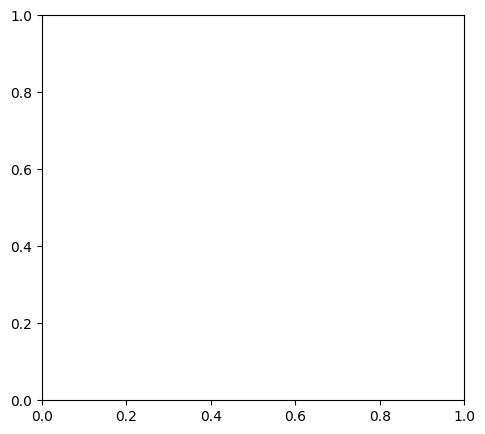

In [20]:
# Train a PCA model and visualize how data points are transformed before and after PCA

import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Original Data (First Two Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("PCA Transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


In [21]:
# Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

data = load_wine()
X, y = data.data, data.target
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=data.target_names))


              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        19
     class_1       1.00      0.90      0.95        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [22]:
# Train a KNN Regressor and analyze the effect of different distance metrics on prediction error

from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=300, n_features=5, noise=0.2, random_state=42)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for metric in ['euclidean', 'manhattan', 'chebyshev']:
    model = KNeighborsRegressor(n_neighbors=5, metric=metric)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    print(f"Metric: {metric}, MSE: {mse:.4f}")


Metric: euclidean, MSE: 2024.2411
Metric: manhattan, MSE: 2001.8748
Metric: chebyshev, MSE: 2267.9676


In [31]:
# Train a KNN Classifier and evaluate using ROC-AUC score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize, StandardScaler
import numpy as np

# Generate a multi-class classification dataset
X, y = make_classification(n_samples=300, n_features=10, n_classes=3,
                           n_informative=5, random_state=42)

# Binarize the output for ROC-AUC calculation
y_bin = label_binarize(y, classes=[0, 1, 2])

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict probabilities
y_score = knn.predict_proba(X_test)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_score, average='macro', multi_class='ovr')
print(f"ROC-AUC Score: {roc_auc:.4f}")


ValueError: Found array with dim 3. None expected <= 2.

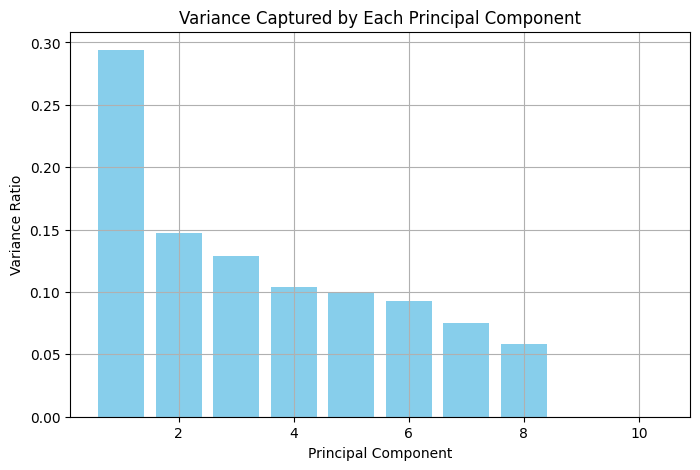

In [24]:
# Train a PCA model and visualize the variance captured by each principal component

pca = PCA()
pca.fit(X)

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Variance Captured by Each Principal Component')
plt.grid(True)
plt.show()


In [25]:
# Train a KNN Classifier and perform feature selection before training

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(f"Accuracy after feature selection: {knn.score(X_test, y_test):.4f}")


Accuracy after feature selection: 0.7556


In [26]:
# Train a PCA model and visualize the data reconstruction error after reducing dimensions

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_pca)

reconstruction_error = ((X - X_reconstructed) ** 2).mean()
print(f"Mean Reconstruction Error: {reconstruction_error:.6f}")


Mean Reconstruction Error: 0.225952


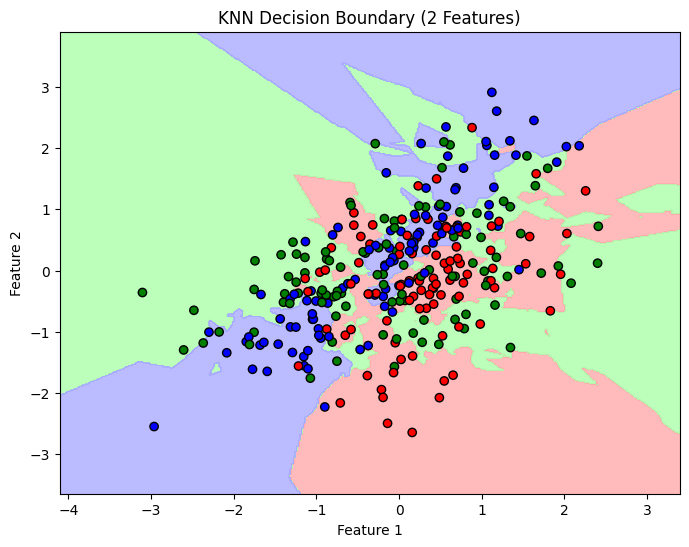

In [27]:
# Train a KNN Classifier and visualize the decision boundary

from matplotlib.colors import ListedColormap

X_2d, y_2d = X[:, :2], y  # Use only 2 features for 2D plot
X_train, X_test, y_train, y_test = train_test_split(X_2d, y_2d, test_size=0.3)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

h = .02
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['red', 'green', 'blue']))
plt.title("KNN Decision Boundary (2 Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


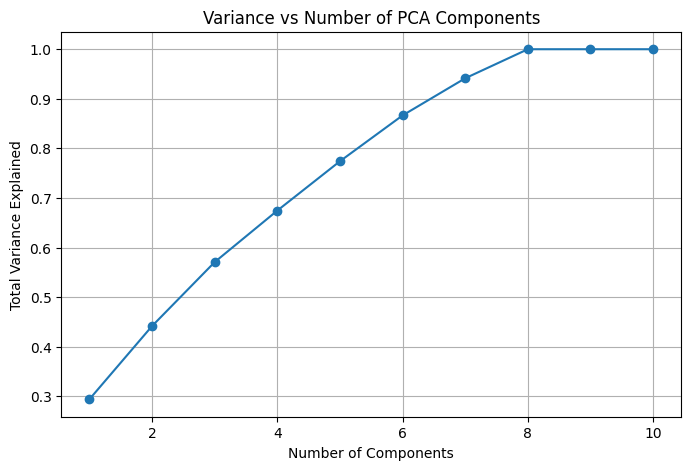

In [28]:
# Train a PCA model and analyze the effect of different numbers of components on data variance

total_variance = []
components_range = range(1, X.shape[1] + 1)

for n in components_range:
    pca = PCA(n_components=n)
    pca.fit(X)
    total_variance.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 5))
plt.plot(components_range, total_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Total Variance Explained")
plt.title("Variance vs Number of PCA Components")
plt.grid(True)
plt.show()
